# Airline passenger Satisfaction Dataset Training

## Data Preprocessing

### Check The Dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder

In [3]:
pd.set_option('display.max_columns',None)
passenger_data=pd.read_csv('data\\train.csv')
passenger_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
passenger_data.drop(['Unnamed: 0','id'],axis=1,inplace=True)
passenger_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
passenger_data.shape

(103904, 23)

#### Convert many categorical column's data type into category data type

In [6]:
categorical_indexes =list(range(6, 20))
passenger_data.iloc[:,categorical_indexes] = passenger_data.iloc[:,categorical_indexes].astype('category')
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  object  
 1   Customer Type                      103904 non-null  object  
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  object  
 4   Class                              103904 non-null  object  
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

### Handle Missing values

In [7]:
passenger_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
# Arrival Delay in Minutes column has 310 missing values, and to handle that, fill all the missing values by the meadian of the column
# since there is no other relationship with missing data, use median
filled_col=passenger_data['Arrival Delay in Minutes'].fillna(passenger_data['Arrival Delay in Minutes'].median(axis=0))
filled_col.head()

0    18.0
1     6.0
2     0.0
3     9.0
4     0.0
Name: Arrival Delay in Minutes, dtype: float64

In [9]:
# both filled and original columns have similar standard deviation values, so that can be replace by the median value
print(passenger_data['Arrival Delay in Minutes'].std())
print(filled_col.std())

38.69868202096663
38.64977613202413


In [10]:
passenger_data['Arrival Delay in Minutes'].fillna(passenger_data['Arrival Delay in Minutes'].median(axis=0),inplace=True)

In [11]:
passenger_data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

- Now there is no any missing values in the dataset

In [12]:
passenger_data.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            446
Arrival Delay in Minutes              455
satisfaction                            2
dtype: int64

- Except Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes columns, all the other columns are categorical columns

### Handle Categorical Columns

#### Handle Few Categories using one hot encoding

- Since Gender, Customer_Type, Type of Travel, Class, and the output column which is satisfaction are having small number of categories, we can perform one hot encoding to handle categories in mentioned columns.

In [13]:
# take categorical columns seperately which are having few categories
df=passenger_data[['Gender','Customer Type','Type of Travel','Class','satisfaction']]
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [14]:
df_dummies=pd.get_dummies(df,dtype=int).astype('category')
df_dummies.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0,1,1,0,0,1,0,0,1,1,0
1,0,1,0,1,1,0,1,0,0,1,0
2,1,0,1,0,1,0,1,0,0,0,1
3,1,0,1,0,1,0,1,0,0,1,0
4,0,1,1,0,1,0,1,0,0,0,1


In [15]:
df_dummies.columns

Index(['Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'satisfaction_neutral or dissatisfied',
       'satisfaction_satisfied'],
      dtype='object')

In [16]:
#avoid dummy variable trap
df_dummies.drop(['Gender_Male','Customer Type_disloyal Customer','Type of Travel_Personal Travel','Class_Eco Plus','satisfaction_neutral or dissatisfied'],axis=1,inplace=True)
df_dummies.head()

,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,satisfaction_satisfied
0,0,1,0,0,0,0
1,0,0,1,1,0,0
2,1,1,1,1,0,1
3,1,1,1,1,0,0
4,0,1,1,1,0,1


In [17]:
# merge above dummy variables with the original dataset 
merged_passenger_data = pd.concat([passenger_data,df_dummies],axis='columns')
merged_passenger_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,satisfaction_satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0,1,0,0,0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0,0,1,1,0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1,1,1,1,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,1,1,1,1,0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,0,1,1,1,0,1


In [18]:
#since there are dummy variables in the merged dataset, no need to have original columns anymore
merged_passenger_data.drop(['Gender','Customer Type','Type of Travel','Class','satisfaction'],axis=1,inplace=True)
merged_passenger_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,0,0,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,1,1,0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,1,1,1,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,1,0,1


#### Handle Many Categories

- from Inflight wifi service column to Cleanliness column, all the in between columns including mentioned columns are having maximum 6 categories for each.
- to handle those multi categorical columns, can't use one hot encoding, since that will lead to curse of dimensionality
- above mentioned columns are having the rating values starting from 1-5

In [ ]:
#ordinal/label encoding
# rank={'1':1,'2':2,'3':3,'4':4,'5':5}
# df['day_ordinal']=df.day_of_week.map(weekday_map)

### Statistics for both categorical and non categorical columns

In [19]:
#statistics for categorical columns
merged_passenger_data.describe(include=['category'])

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,satisfaction_satisfied
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2,2,2,2,2,2
top,3,4,3,3,4,4,4,4,4,4,4,4,4,4,1,1,1,0,0,0
freq,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,52727,84923,71655,54239,57159,58879


In [20]:
# get statistics for numerical value columns
merged_passenger_data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


### Split dataset into train and test data

In [21]:
x=merged_passenger_data.drop('satisfaction_satisfied',axis=1)
y=merged_passenger_data['satisfaction_satisfied']

### Feature Selection

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [23]:
#higher the value, more relavant the feature is
print(model.feature_importances_)

[0.02196238 0.02279152 0.13697265 0.01825304 0.04043408 0.01841205
 0.01310173 0.10245901 0.04848447 0.05345613 0.03193274 0.03167846
 0.03324635 0.03111857 0.02568116 0.02793657 0.01100429 0.01131378
 0.00677011 0.04769568 0.09548623 0.10292176 0.06688727]


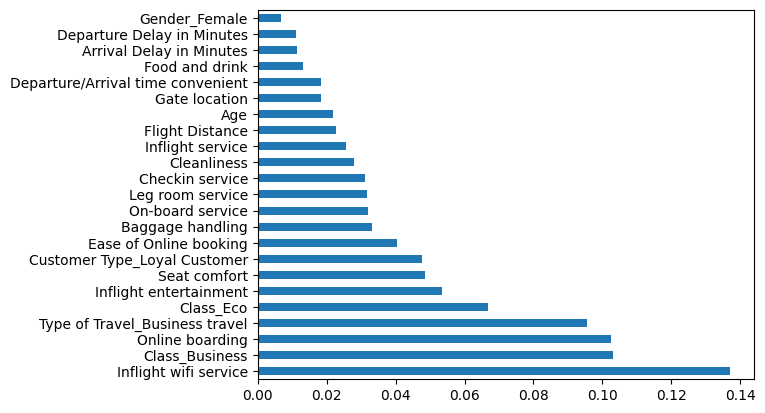

In [24]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(23).plot(kind='barh')
plt.show()

- Above graph shows importance of the features, to predict the satisfaction level
- By considering the graph, we can ignore features that are less important since they may lead to curse of dimensionality
- by reducing number of features, able to increase the accuracy as well
- so that considered only top 18 features in order to train the model

In [25]:
#ignore the least important columns
x.drop(['Gate location','Food and drink','Arrival Delay in Minutes','Departure Delay in Minutes','Gender_Female'],axis=1,inplace=True)
x.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco
0,13,460,3,4,3,3,5,5,4,3,4,4,5,5,1,0,0,0
1,25,235,3,2,3,3,1,1,1,5,3,1,4,1,0,1,1,0
2,26,1142,2,2,2,5,5,5,4,3,4,4,4,5,1,1,1,0
3,25,562,2,5,5,2,2,2,2,5,3,1,4,2,1,1,1,0
4,61,214,3,3,3,5,5,3,3,4,4,3,3,3,1,1,1,0


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(103904, 18)
(72732, 18)
(31172, 18)


# Model Training

In [28]:
##import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

#### function to get accuracy for train and test data using different algorithms

In [29]:
#created a function to predict train and test accuracy
def model_prediction(x_values, y_values,predict_model):
    pred=predict_model.predict(x_values)
    score_=predict_model.score(x_values,y_values)
    conf_m=confusion_matrix(y_values,pred)
    report=classification_report(y_values,pred)
    
    print('confusion matrix: ',conf_m,sep='\n',end='\n\n')
    print('report: ',report,sep='\n')
    print('Accuracy: ',accuracy_score(y_values,pred))

## Logistic regression

In [30]:
# train the model using logistic Regression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

c:\Users\94775\Desktop\Airline_Passenger_Satisfaction_Prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
print('intercept: ',logistic_model.intercept_)
print('coef: ',logistic_model.coef_,end='\n\n')

intercept:  [-1.57433599]
coef:  [[-2.06975477e-02 -3.23296430e-05  5.87020908e-01 -2.61177464e-01
  -3.08511613e-01  4.48171639e-01 -2.09344421e-01  6.09797352e-01
  -1.60465880e-02  1.79455957e-01 -1.24049976e-01  8.40737058e-02
  -2.26640541e-01 -1.43350821e-01  2.60348521e-01  5.92980058e-01
   6.96308164e-01 -1.63804545e+00]]



In [63]:
#train data accuracy
print('Training Data\n')
print(model_prediction(x_train,y_train,logistic_model))

print('==========================================================\n')

#test data accuracy
print('Testing Data\n')
print(model_prediction(x_test,y_test,logistic_model))

Training Data

confusion matrix: 
[[33571  7681]
 [ 5459 26021]]

report: 
              precision    recall  f1-score   support

           0       0.86      0.81      0.84     41252
           1       0.77      0.83      0.80     31480

    accuracy                           0.82     72732
   macro avg       0.82      0.82      0.82     72732
weighted avg       0.82      0.82      0.82     72732

Accuracy:  0.8193367431116977
None

Testing Data

confusion matrix: 
[[14285  3342]
 [ 2244 11301]]

report: 
              precision    recall  f1-score   support

           0       0.86      0.81      0.84     17627
           1       0.77      0.83      0.80     13545

    accuracy                           0.82     31172
   macro avg       0.82      0.82      0.82     31172
weighted avg       0.82      0.82      0.82     31172

Accuracy:  0.8208007185936097
None


## K Nearest Neighbors Classifier

In [32]:
knn_model=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [33]:
#train data accuracy
print('Training Data\n')
print(model_prediction(x_train,y_train,knn_model))

print('==========================================================\n')

#test data accuracy
print('Testing Data\n')
print(model_prediction(x_test,y_test,knn_model))

Training Data

confusion matrix: 
[[37491  3761]
 [ 6048 25432]]

report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     41252
           1       0.87      0.81      0.84     31480

    accuracy                           0.87     72732
   macro avg       0.87      0.86      0.86     72732
weighted avg       0.87      0.87      0.86     72732

Accuracy:  0.8651350162239454
None

Testing Data

confusion matrix: 
[[15053  2574]
 [ 3524 10021]]

report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     17627
           1       0.80      0.74      0.77     13545

    accuracy                           0.80     31172
   macro avg       0.80      0.80      0.80     31172
weighted avg       0.80      0.80      0.80     31172

Accuracy:  0.8043757218016169
None


## SVM

In [34]:
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [35]:
#train data accuracy
print('Training Data\n')
print(model_prediction(x_train,y_train,svc_model))

print('==========================================================\n')

#test data accuracy
print('Testing Data\n')
print(model_prediction(x_test,y_test,svc_model))

Training Data

confusion matrix: 
[[34501  6751]
 [17360 14120]]

report: 
              precision    recall  f1-score   support

           0       0.67      0.84      0.74     41252
           1       0.68      0.45      0.54     31480

    accuracy                           0.67     72732
   macro avg       0.67      0.64      0.64     72732
weighted avg       0.67      0.67      0.65     72732

Accuracy:  0.6684952978056427
None

Testing Data

confusion matrix: 
[[14644  2983]
 [ 7405  6140]]

report: 
              precision    recall  f1-score   support

           0       0.66      0.83      0.74     17627
           1       0.67      0.45      0.54     13545

    accuracy                           0.67     31172
   macro avg       0.67      0.64      0.64     31172
weighted avg       0.67      0.67      0.65     31172

Accuracy:  0.6667522135249583
None


#### Find Best Model for train the Dataset
- Logistic regression
1. Training Accuracy - 0.8193367431116977
2. Testing Accuracy - 0.8208007185936097

- K Nearest Neighbors Classifier
1. Training Accuracy - 0.8651350162239454
2. Testing Accuracy - 0.8043757218016169

- Support Vector Classifier
1. Training Accuracy - 0.6684952978056427
2. Testing Accuracy - 0.6667522135249583


- Above are the used classification models and their corresponding accuracies. Out of all, selected logistic regression as the best model to train the dataset, since it gives similar accuracy value for both training and testing data

### Logistic Regression

In [40]:
pred=logistic_model.predict(x_test)
score_=logistic_model.score(x_test,y_test)
conf_m=confusion_matrix(y_test,pred)
report=classification_report(y_test,pred)
print('Accuracy: ',(accuracy_score(y_test,pred))*100)

Accuracy:  82.08007185936097
